In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [14]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 1
DOLLAR_THRESHOLD = "115009542m"
EVENT_NAME = "CUSUM"
EVENT_THRESHOLD = 2.52e-04

START_DATE = "20210101"
END_DATE = "20241231"

# Build base name
if SAMPLE_TYPE == "dollar":
    RESAMPLED_NAME = f"{SYMBOL}-{DOLLAR_THRESHOLD}-dollar-{START_DATE}-{END_DATE}"
else:
    RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"
LABEL_NAME = "TB"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
NORMALIZED_DIR = BASE_DIR / "normalized"
SCALER_DIR = BASE_DIR / "scalers"
EVENTS_DIR = BASE_DIR / "events"

# Final paths
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}-processed.pkl"
NORMALIZED_FILE_PATH = NORMALIZED_DIR / f"{RESAMPLED_NAME}-normalized.pkl"
STD_SCALER_PATH = SCALER_DIR / f"{RESAMPLED_NAME}_standard_scaler.pkl"
MINMAX_SCALER_PATH = SCALER_DIR / f"{RESAMPLED_NAME}_minmax_scaler.pkl"
EVENT_FILE_PATH = EVENTS_DIR / f"{RESAMPLED_NAME}_{EVENT_NAME}_{EVENT_THRESHOLD:.2e}.pkl"

In [15]:
DIRECTION_LABEL_DIR = BASE_DIR / "direction_labels"
DIRECTION_LABEL_DIR.mkdir(parents=True, exist_ok=True)
DIRECTION_LABEL_FILE_PATH = DIRECTION_LABEL_DIR / f"{RESAMPLED_NAME}-{EVENT_NAME}-{LABEL_NAME}.pkl"

In [16]:
df = pd.read_pickle(NORMALIZED_FILE_PATH)

In [17]:
labels = pd.read_pickle(DIRECTION_LABEL_FILE_PATH)

In [18]:
df.columns.to_list()

['open',
 'high',
 'low',
 'close',
 'volume',
 'spread',
 'close_delta',
 'close_return',
 'close_log_return',
 'ret_mean_5',
 'ret_mean_10',
 'ret_mean_15',
 'ret_mean_20',
 'log_volume',
 'rv5',
 'log_rv5',
 'sqrt_rv5',
 'rv15',
 'log_rv15',
 'sqrt_rv15',
 'rv50',
 'log_rv50',
 'sqrt_rv50',
 'ema5',
 'ema5_slope',
 'close_above_ema5',
 'ema20',
 'ema20_slope',
 'close_above_ema20',
 'ema50',
 'ema50_slope',
 'close_above_ema50',
 'ema100',
 'ema100_slope',
 'close_above_ema100',
 'atr14',
 'atr60',
 'atr120',
 'log_atr14',
 'atr14_percent',
 'atr14_adjusted_return',
 'log_atr60',
 'atr60_percent',
 'atr60_adjusted_return',
 'log_atr120',
 'atr120_percent',
 'atr120_adjusted_return',
 'adx14',
 'plus_di14',
 'minus_di14',
 'bb_upper',
 'bb_lower',
 'bb_mavg',
 'bb_width',
 'bb_position',
 'dc20_upper',
 'dc20_lower',
 'dc20_mid',
 'dc20_width',
 'close_above_dc20_mid',
 'dc20_breakout',
 'dc20_breakdown',
 'dc50_upper',
 'dc50_lower',
 'dc50_mid',
 'dc50_width',
 'close_above_dc50_mi

In [5]:
df['close_above_ema50'].value_counts()

close_above_ema50
1    780037
0    707038
Name: count, dtype: int64

In [6]:
df['macd_diff'].describe()

count    1.487075e+06
mean    -2.696653e-18
std      1.000000e+00
min     -5.387525e+01
25%     -3.683259e-01
50%     -2.740390e-03
75%      3.656107e-01
max      2.992641e+01
Name: macd_diff, dtype: float64

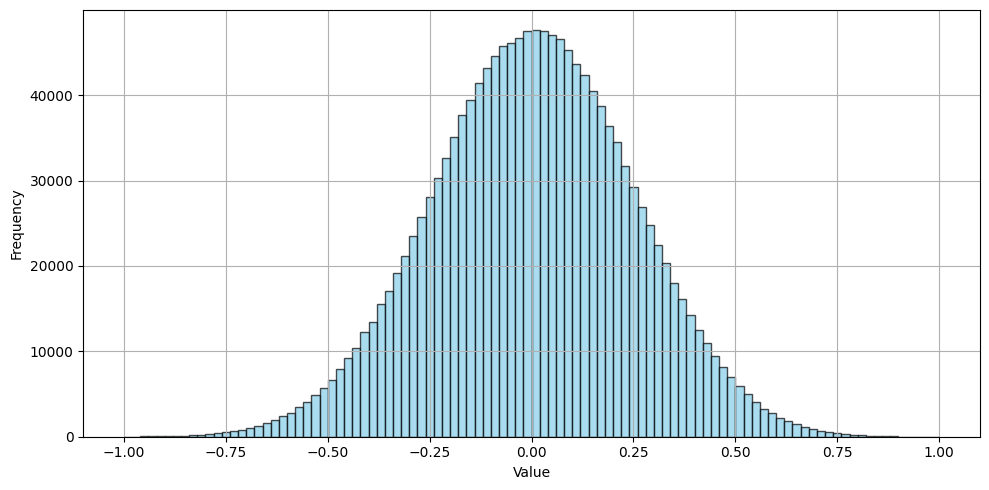

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['rsi14'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

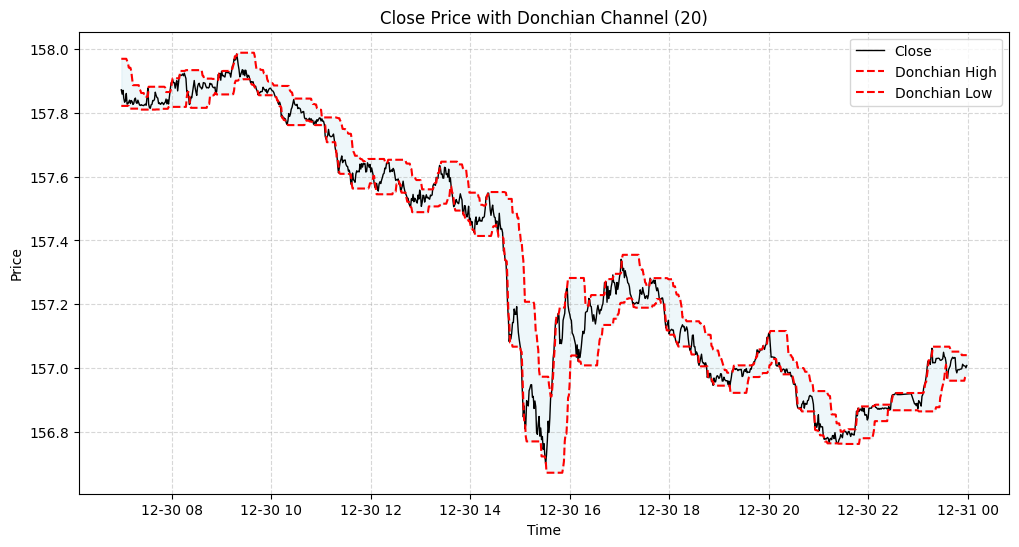

In [8]:
df1000 = df.iloc[-1000:]
plt.figure(figsize=(12,6))
plt.plot(df1000.index, df1000['close'], label="Close", color="black", linewidth=1)
plt.plot(df1000.index, df1000['dc20_upper'], label="Donchian High", color="red", linestyle="--")
plt.plot(df1000.index, df1000['dc20_lower'], label="Donchian Low", color="red", linestyle="--")

# Fill channel area
plt.fill_between(df1000.index, df1000['dc20_lower'], df1000['dc20_upper'], color="lightblue", alpha=0.2)

plt.title(f"Close Price with Donchian Channel ({20})")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()